In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_path = "C:/Users/35191/Desktop/ThesisData/piezometers/my_boreholesA.csv"

df = pd.read_csv(file_path, low_memory=False)
df

,date_34/32,34/32,date_219/3,219/3,date_228/52,228/52,date_229/278,229/278,date_229/285,229/285,...,date_524/51,524/51,date_524/82,524/82,date_524/83,524/83,date_532/153,532/153,date_532/75,532/75
0,02/01/2015,348.9,01/03/1979,71.21,11/01/2007,71.61,20/02/2009,72.96,24/01/2020,80.93,...,30/01/1996,236.73,10/10/2000,240.48,10/10/2000,233.89,10/10/2000,150.59,01/10/2000,146.31
1,31/01/2015,349.0,01/06/1979,53.04,09/02/2007,71.72,20/03/2009,72.66,17/02/2020,81.05,...,06/03/1996,238.57,15/11/2000,240.60,15/11/2000,235.20,16/11/2000,152.33,15/10/2000,146.33
2,28/02/2015,348.5,01/08/1979,51.90,07/03/2007,71.90,20/04/2009,72.31,17/03/2020,81.02,...,20/11/1996,241.35,19/12/2000,240.79,20/12/2000,235.70,20/12/2000,153.18,01/11/2000,146.32
3,01/04/2015,320.7,01/10/1979,54.56,19/04/2007,71.34,18/05/2009,71.84,20/04/2020,81.15,...,15/01/1997,242.81,18/01/2001,242.58,18/01/2001,238.35,18/01/2001,154.77,15/11/2000,146.31
4,01/05/2015,349.0,01/03/1980,57.54,14/05/2007,71.29,17/06/2009,70.65,18/05/2020,81.08,...,30/04/1997,242.35,15/02/2001,242.34,15/02/2001,239.78,15/02/2001,155.11,01/12/2000,146.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Function to extract borehole names from column names
borehole_names = [col[len('date_'):] for col in df.columns if col.startswith('date_')]

def bh_datapair(df, id):
    # Define columns based on index
    col1 = df.columns[(id - 0) * 2]
    col2 = df.columns[(id - 0) * 2 + 1]
    # select the two columns
    selected_columns = df[[col1, col2]]
    selected_columns.set_index(col1, inplace=True)
    return selected_columns
df2 = bh_datapair(df, 1) 
print(df2)

            219/3
date_219/3       
01/03/1979  71.21
01/06/1979  53.04
01/08/1979  51.90
01/10/1979  54.56
01/03/1980  57.54
...           ...
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN

[62187 rows x 1 columns]


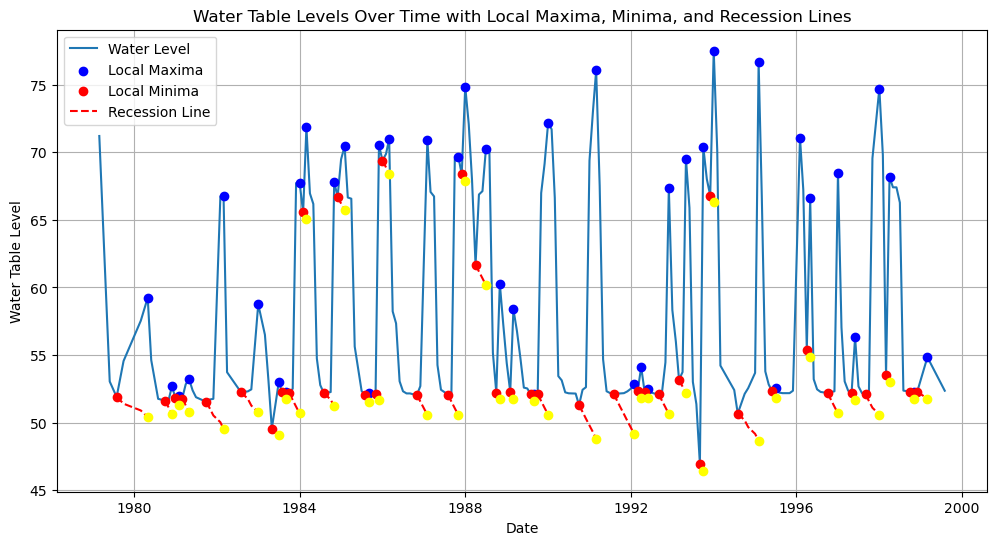

In [13]:
# Extract date and water_table series
date = pd.to_datetime(df2.index, format="%d/%m/%Y", dayfirst=True)
water_table = df2.iloc[:, 0]

# Filter out NaT values
valid_indices = ~pd.isnull(date)
date = date[valid_indices]
water_table = water_table[valid_indices]

# Step 3: Find local maxima and minima
local_max = []
local_max_idx = []
local_min = []
local_min_idx = []
for idx in range(1, len(water_table) - 1):
    if water_table.iloc[idx - 1] < water_table.iloc[idx] > water_table.iloc[idx + 1]:
        local_max.append(water_table.iloc[idx])
        local_max_idx.append(idx)
    if water_table.iloc[idx - 1] > water_table.iloc[idx] < water_table.iloc[idx + 1]:
        local_min.append(water_table.iloc[idx])
        local_min_idx.append(idx)


# Specify a single recession rate
specified_recession_rate = -0.5  # example value, negative to represent a decrease

# Initialize variable to keep track of the previously plotted date
prev_plot_date = None

# Step 4: Plot the series with local maxima and minima
plt.figure(figsize=(12, 6))
plt.plot(date, water_table, label='Water Level')

# Mark local maxima points in blue
if local_max_idx:
    plt.scatter([date[idx] for idx in local_max_idx], [water_table.iloc[idx] for idx in local_max_idx], color='blue', label='Local Maxima', zorder=5)

# Mark local minima points in red
if local_min_idx:
    plt.scatter([date[idx] for idx in local_min_idx], [water_table.iloc[idx] for idx in local_min_idx], color='red', label='Local Minima', zorder=5)

# Initialize an empty list to store water level values at yellow points
yellow_point_water_levels = []
yellow_point_local_max_values = []
idx_nms = []
idx_lms = []
# Plot the recession lines for each local minimum using the specified recession rate
for i in range(len(local_min_idx)):
    min_idx = local_min_idx[i]
    min_val = local_min[i]
    
    # Find the next local maximum that follows this local minimum
    next_max_idx = next((idx for idx in local_max_idx if idx > min_idx), len(water_table) - 1)
    
    x_values = np.arange(min_idx, next_max_idx + 1)
    y_values = min_val + specified_recession_rate * (x_values - min_idx)
    
    # Ensure the line does not go below the next minimum or the end of the series
    y_values = np.clip(y_values, None, min(water_table[min_idx:next_max_idx + 1]))
        
    # Plot the recession line only if the date on the yellow tick is different from the previous one
    if prev_plot_date is None or date[next_max_idx] != prev_plot_date:
        plt.plot([date[j] for j in x_values], y_values, 'r--', label='Recession Line' if i == 0 else "", zorder=4)
        prev_plot_date = date[next_max_idx]  # Update the previously plotted date
    
        # Plot a yellow point at the endpoint of each recession line
        plt.scatter(date[next_max_idx], y_values[-1], color='yellow', zorder=6)

        # Store the water level value at the yellow point
        yellow_point_water_levels.append(y_values[-1])
        

        # Store the corresponding local maximum value
        yellow_point_local_max_values.append(water_table.iloc[next_max_idx])
        idx_nms.append(next_max_idx)
        idx_lms.append(min_idx)
    
        # Print the water level value at the yellow point
        #print(f"Water level at {date[next_max_idx].date()} (yellow point): {y_values[-1]}")

plt.title('Water Table Levels Over Time with Local Maxima, Minima, and Recession Lines')
plt.xlabel('Date')
plt.ylabel('Water Table Level')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Print the list of water level values at yellow points
f = yellow_point_local_max_values
print(f)
g = yellow_point_water_levels
print(g)
difs = []
indices = []
yearly_sum = {}
for i, (f_val, g_val) in enumerate(zip(f, g)):
    if g_val > 0:
        diff = f_val - g_val
        if diff > 0:
            difs.append(diff)
            indices.append(i)
print(difs)

[59.24, 52.71, 51.95, 53.22, 66.77, 58.76, 52.98, 52.27, 67.76, 71.85, 67.81, 70.45, 52.18, 70.55, 70.98, 70.9, 69.69, 74.87, 70.22, 60.29, 58.38, 52.12, 72.16, 76.07, 52.87, 54.12, 52.52, 67.36, 69.54, 70.41, 77.52, 76.69, 52.56, 66.59, 68.49, 56.31, 74.72, 68.19, 52.29, 54.84]
[50.4, 50.63, 51.29, 50.78, 49.53, 50.76, 49.06, 51.76, 50.68, 65.06, 51.2, 65.71, 51.53, 51.64, 68.39, 50.56, 50.56, 67.88, 60.18, 51.72, 51.78, 51.61, 50.59, 48.79, 49.13, 51.83, 51.8, 50.63, 52.17, 46.44, 66.3, 48.67, 51.81, 54.88, 50.68, 51.68, 50.6, 53.03, 51.78, 51.78]
[8.840000000000003, 2.0799999999999983, 0.6600000000000037, 2.4399999999999977, 17.239999999999995, 8.0, 3.9199999999999946, 0.5100000000000051, 17.080000000000005, 6.789999999999992, 16.61, 4.740000000000009, 0.6499999999999986, 18.909999999999997, 2.5900000000000034, 20.340000000000003, 19.129999999999995, 6.990000000000009, 10.04, 8.57, 6.600000000000001, 0.509999999999998, 21.569999999999993, 27.279999999999994, 3.739999999999995, 2.289

In [15]:
dh_values1 = [h * 0.1 * 1000 for h in difs]
# Compute the mean of the dh values
Ra = sum(dh_values1)/ len(dh_values1)
print(Ra)

1034.75


In [16]:
# Step 1: Extract year for each date corresponding to yellow_point_local_max_values
yellow_point_years = [date[idx].year for idx in idx_nms]
print(yellow_point_years)
# Step 2: Create a dictionary to accumulate differences for each year
yearly_diffs = {}
# Step 3: Iterate over the differences and sum them by year
for i, (f_val, g_val, year) in enumerate(zip(f, g, yellow_point_years)):
    if g_val > 0:
        diff = f_val - g_val
        if diff > 0:
            if year not in yearly_diffs:
                yearly_diffs[year] = 0
            yearly_diffs[year] += diff
print(yearly_diffs)

[1980, 1980, 1981, 1981, 1982, 1983, 1983, 1983, 1984, 1984, 1984, 1985, 1985, 1985, 1986, 1987, 1987, 1988, 1988, 1988, 1989, 1989, 1990, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1994, 1995, 1995, 1996, 1997, 1997, 1998, 1998, 1998, 1999]
{1980: 10.920000000000002, 1981: 3.1000000000000014, 1982: 17.239999999999995, 1983: 12.43, 1984: 40.48, 1985: 24.300000000000004, 1986: 2.5900000000000034, 1987: 39.47, 1988: 25.60000000000001, 1989: 7.109999999999999, 1990: 21.569999999999993, 1991: 27.279999999999994, 1992: 23.479999999999997, 1993: 41.34, 1994: 11.219999999999999, 1995: 28.769999999999996, 1996: 11.71, 1997: 22.439999999999998, 1998: 39.78999999999999, 1999: 3.0600000000000023}


In [17]:
# Convert yearly_diffs to a DataFrame
dp = pd.DataFrame(list(yearly_diffs.items()), columns=['years', 'diffs'])
print(dp)

    years  diffs
0    1980  10.92
1    1981   3.10
2    1982  17.24
3    1983  12.43
4    1984  40.48
5    1985  24.30
6    1986   2.59
7    1987  39.47
8    1988  25.60
9    1989   7.11
10   1990  21.57
11   1991  27.28
12   1992  23.48
13   1993  41.34
14   1994  11.22
15   1995  28.77
16   1996  11.71
17   1997  22.44
18   1998  39.79
19   1999   3.06


In [18]:
diffs_mm = dp['diffs'] * 0.026 * 1000 
Ri = diffs_mm.mean()
print(Ri)

538.0699999999998


In [19]:
'''date_col = pd.to_datetime(date, format='%d/%m/%Y')
# Calculate the number of days since the start of the data
num_day = (date_col - date_col.min()).days
print(num_day)'''

"date_col = pd.to_datetime(date, format='%d/%m/%Y')\n# Calculate the number of days since the start of the data\nnum_day = (date_col - date_col.min()).days\nprint(num_day)"

In [20]:
'''ypd1 = num_day[idx_nms]
ypd2 = num_day[idx_lms]
dt = ypd1 - ypd2
print(ypd1)
print(ypd2)
#dt = np.abs(ypd3)
print(dt)'''

'ypd1 = num_day[idx_nms]\nypd2 = num_day[idx_lms]\ndt = ypd1 - ypd2\nprint(ypd1)\nprint(ypd2)\n#dt = np.abs(ypd3)\nprint(dt)'

In [21]:
'''Wat_lev_change = difs/dt
Wat_lev_change'''

'Wat_lev_change = difs/dt\nWat_lev_change'

In [22]:
'''Rf = [i * 0.1 * 1000 for i in Wat_lev_change]
# Compute the mean of the dh values
Rf = sum(Rf)/ len(Rf)
print(Rf)'''

'Rf = [i * 0.1 * 1000 for i in Wat_lev_change]\n# Compute the mean of the dh values\nRf = sum(Rf)/ len(Rf)\nprint(Rf)'

In [23]:
# Read the borehole_specific_yield.csv file into a DataFrame
df_sy = pd.read_csv('C:/Users/35191/Desktop/ThesisData/piezometers/borehole_specific_yield.csv')

# Function to extract borehole names from column names
borehole_names = [col[len('date_'):] for col in df.columns if col.startswith('date_')]

def bh_datapair(df, id):
    # Define columns based on index
    col1 = df.columns[(id - 0) * 2]
    col2 = df.columns[(id - 0) * 2 + 1]
    # select the two columns
    selected_columns = df[[col1, col2]]
    selected_columns.set_index(col1, inplace=True)
    return selected_columns

# Initialize lists to store results
all_yellow_point_local_max_values = []
all_yellow_point_water_levels = []
borehole_difs = []
yellow_point_years = []     # Initialize list to store yellow point years
yearly_diffs = [{} for _ in range(len(borehole_names))]    # Initialize dictionary to store yearly differences

# Iterate through each borehole
for i, borehole_name in enumerate(borehole_names):
    df2 = bh_datapair(df, i)
    date = pd.to_datetime(df2.index, format="%d/%m/%Y", dayfirst=True)
    water_table = df2.iloc[:, 0]

    # Filter out NaT values
    valid_indices = ~pd.isnull(date)
    date = date[valid_indices]
    water_table = water_table[valid_indices]

    # Find local maxima and minima
    local_max = []
    local_max_idx = []
    local_min = []
    local_min_idx = []
    for idx in range(1, len(water_table) - 1):
        if water_table.iloc[idx - 1] < water_table.iloc[idx] > water_table.iloc[idx + 1]:
            local_max.append(water_table.iloc[idx])
            local_max_idx.append(idx)
        if water_table.iloc[idx - 1] > water_table.iloc[idx] < water_table.iloc[idx + 1]:
            local_min.append(water_table.iloc[idx])
            local_min_idx.append(idx)

    # Specify a single recession rate
    specified_recession_rate = -0.5  # example value, negative to represent a decrease

    # Initialize variable to keep track of the previously plotted date
    prev_plot_date = None

    # Initialize lists to store water level values at yellow points for this borehole
    yellow_point_water_levels = []
    yellow_point_local_max_values = []
    yellow_point_year_list = []         # Initialize list to store yellow point years for this borehole

    # Plot the recession lines for each local minimum using the specified recession rate
    for j in range(len(local_min_idx)):
        min_idx = local_min_idx[j]
        min_val = local_min[j]

        # Find the next local maximum that follows this local minimum
        next_max_idx = next((idx for idx in local_max_idx if idx > min_idx), len(water_table) - 1)

        x_values = np.arange(min_idx, next_max_idx + 1)
        y_values = min_val + specified_recession_rate * (x_values - min_idx)

        # Ensure the line does not go below the next minimum or the end of the series
        y_values = np.clip(y_values, None, min(water_table[min_idx:next_max_idx + 1]))

        # Plot the recession line only if the date on the yellow tick is different from the previous one
        if prev_plot_date is None or date[next_max_idx] != prev_plot_date:
            prev_plot_date = date[next_max_idx]  # Update the previously plotted date

            # Store the water level value at the yellow point
            yellow_point_water_levels.append(y_values[-1])

            # Store the corresponding local maximum value
            yellow_point_local_max_values.append(water_table.iloc[next_max_idx])

            # Store the year of the yellow point
            yellow_point_year_list.append(date[next_max_idx].year)

    # Append the results for this borehole to the main lists
    all_yellow_point_local_max_values.append(yellow_point_local_max_values)
    all_yellow_point_water_levels.append(yellow_point_water_levels)
    yellow_point_years.append(yellow_point_year_list)      # Append the yellow point years for this borehole

    # Compute the differences for this borehole
    borehole_difs.append([])
    for local_max, water_level in zip(yellow_point_local_max_values, yellow_point_water_levels):
        if water_level > 0:
            diff = local_max - water_level
            if diff > 0:
                borehole_difs[-1].append(diff)
                year = yellow_point_year_list[len(borehole_difs[-1]) - 1]
                if year not in yearly_diffs[i]:
                    yearly_diffs[i][year] = 0
                yearly_diffs[i][year] += diff

# Display the yearly_diffs for each borehole
for bh_idx, diffs_dict in enumerate(yearly_diffs):
    borehole_name = borehole_names[bh_idx]
    #print(f"Borehole: {borehole_name}")
    #for year, diff_sum in diffs_dict.items():
        #print(f"Year: {year}, Sum of Differences: {diff_sum}")
    #print()



#compute Ra for each borehole
Ra_values = []
for i, difs in enumerate(borehole_difs):
    dh_values = [h * df_sy[df_sy['borehole'] == borehole_names[i]]['sy'].values[0] * 1000 for h in difs]
    if dh_values:
        Ra = sum(dh_values) / len(dh_values)
        Ra_values.append(Ra)
    else:
        Ra_values.append(None)  # Handle the case where there are no valid dh_values

# Create a DataFrame to store Ra values for each borehole
Ra_df = pd.DataFrame({
    'Borehole': borehole_names,
    'Ra': Ra_values
})

# Display the Ra DataFrame
#print(yearly_diffs)

In [24]:
# Now compute average annual recharge for each borehole
average_recharge = []

for borehole, diffs_dict in enumerate(yearly_diffs):
    if diffs_dict:
        total_sum = sum(diffs_dict.values())
        num_years = len(diffs_dict)
        avg_recharge = total_sum / num_years
    else:
        avg_recharge = None  # Handle case where there are no differences
    
    average_recharge.append(avg_recharge)

# Display the average recharge for each borehole
'''for i, borehole_name in enumerate(borehole_names):
    print(f"Borehole: {borehole_name}, Average Annual Recharge: {average_recharge[i]}")'''


# Create a DataFrame to store average annual recharge values for each borehole
average_recharge_df = pd.DataFrame({
    'Borehole': borehole_names,
    'Average_Annual_Recharge': average_recharge
})
#average_recharge_df.to_csv('C:/Users/35191/Desktop/ThesisData/piezometers/average_annual_recharge_df_Graph1.csv')
# Display the average_recharge_df
print("\nAverage Annual Recharge for Each Borehole:")
print(average_recharge_df)


Average Annual Recharge for Each Borehole:
    Borehole  Average_Annual_Recharge
0      34/32                 7.861111
1      219/3                20.695000
2     228/52                 3.760000
3    229/278                 8.533333
4    229/285                 3.810000
..       ...                      ...
143   524/51                 6.604500
144   524/82                 7.480000
145   524/83                 0.970000
146  532/153                 2.145000
147   532/75                 4.770769

[148 rows x 2 columns]


In [25]:
# Initialize an empty dictionary to store recharge values for each borehole
recharge_dict = {}

# Iterate through each borehole in df_sy DataFrame
for index, row in df_sy.iterrows():
    borehole = row['borehole']
    borehole_sy = row['sy']
    
    # Extract Average_Annual_Recharge for the current borehole from average_recharge_df
    if borehole in average_recharge_df['Borehole'].values:
        average_recharge = average_recharge_df.loc[average_recharge_df['Borehole'] == borehole, 'Average_Annual_Recharge'].iloc[0]
        
        # Calculate recharge for the current borehole
        recharge = borehole_sy * average_recharge * 1000
        
        # Store recharge values in the dictionary with borehole name as key
        recharge_dict[borehole] = recharge

# Convert the dictionary to a DataFrame
recharge_df = pd.DataFrame(list(recharge_dict.items()), columns=['Borehole', 'Recharge'])

# Display the resulting recharge_df
print(recharge_df)
#recharge_df.to_csv('C:/Users/35191/Desktop/ThesisData/piezometers/average_annual_recharge_df_Graph2.csv')

    Borehole    Recharge
0      34/32  204.388889
1     512/32  416.520000
2    524/116   85.900000
3    524/114   26.260000
4    512/215  112.320000
..       ...         ...
143   299/60  846.333333
144   299/74  234.636364
145   299/79         NaN
146  310/158  273.800000
147  519/300  902.600000

[148 rows x 2 columns]
